In [1]:
import pandas as pd
import numpy as np

In [2]:
tv = pd.read_csv('../inputCSVs/tv.csv')

In [3]:
tv.shape

(56410, 4)

In [4]:
# Check the missing values in df
null_values=tv.isna().sum()


In [5]:
null_values

Unnamed: 0    0
product_Id    0
rating        0
reviews       0
dtype: int64

In [6]:
tv.shape

(56410, 4)

In [7]:
# !pip3 install gensim
# !pip3 install pyldavis
# !pip3 install nltk
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install textblob
# !pip3 install spacy
# !python3 -m spacy download en 

In [8]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samridhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
pd.set_option("display.max_colwidth", 200)
import re
import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
%matplotlib inline

In [10]:
# a function that provides the most frequent words with count on a plot
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  print(d)
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

In [11]:
tv['reviews']

0        Bought this TV after a great many days of pondering and reviewing various brands and styles .Put my bet on Sony 's name and all the good praise given to this model .Exactly one year after I bought...
1        This TV has a very good picture for regular TV , and composite inputs .But , I did not buy it to watch regular cable TV , or to watch old VHS tapes .I bought this TV because I wanted a pretty high...
2        I got one of these 27 '' Wegas , as soon as I selected channel 35 to watch CNN I noticed a mild stretching and shrinking of the news tickers on the bottom left corner of the screen .There was also...
3        I 'll not repeat all the comments of previous review , except to say the glowing praise of clarity and detail , as well as the 16 : 9 feature are on target .The complaints about the weight and dee...
4        I 've had this television for probably about a year .It is a fantastic set .I am no videophile but I can tell you that it has the best picture of any set t

        word   count
23       the  472052
35         ,  341892
10       and  258095
4          a  248153
27        to  241406
32         I  202697
34        it  183655
77        is  174906
2         TV  136949
8         of  125022
1       this  122394
54       for  117309
40        .I  100174
122     that   98653
18        on   96580
116     with   91975
213       in   91573
120      was   88875
143     have   82557
95         .   77022
148      you   75081
16        my   70673
59       but   68207
104      not   67559
79      .The   62230
400      n't   59778
98   picture   54553
20        's   52214
153    -RRB-   49000
159       as   48811


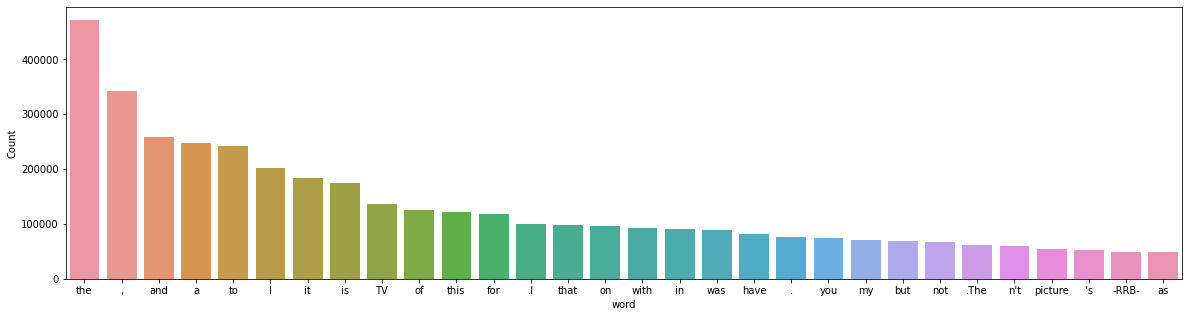

In [12]:
freq_words(tv['reviews'])

In [13]:
# replace "n't" with " not"
tv['reviews']= tv['reviews'].str.replace("n\'t", " not")

# remove unwanted characters, numbers and symbols
tv['reviews'] = tv['reviews'].str.replace("[^a-zA-Z#]", " ")

/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/2418747550.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tv['reviews'] = tv['reviews'].str.replace("[^a-zA-Z#]", " ")


In [14]:
tv['reviews']

0        Bought this TV after a great many days of pondering and reviewing various brands and styles  Put my bet on Sony  s name and all the good praise given to this model  Exactly one year after I bought...
1        This TV has a very good picture for regular TV   and composite inputs  But   I did not buy it to watch regular cable TV   or to watch old VHS tapes  I bought this TV because I wanted a pretty high...
2        I got one of these       Wegas   as soon as I selected channel    to watch CNN I noticed a mild stretching and shrinking of the news tickers on the bottom left corner of the screen  There was also...
3        I  ll not repeat all the comments of previous review   except to say the glowing praise of clarity and detail   as well as the        feature are on target  The complaints about the weight and dee...
4        I  ve had this television for probably about a year  It is a fantastic set  I am no videophile but I can tell you that it has the best picture of any set t

        word   count
23       the  472726
32         I  311816
10       and  258591
4          a  248567
27        to  241827
34        it  183764
76        is  174963
2         TV  138936
101      not  127432
8         of  125356
1       this  122430
52       for  117362
119     that   98673
18        on   98258
208       in   95303
113     with   91998
117      was   88909
141     have   82592
146      you   75128
78       The   73939
16        my   70696
57       but   68237
95   picture   54996
151      RRB   54885
20         s   53338
148      LRB   51694
157       as   48861
293      are   48111
590       be   43082
71        so   38601


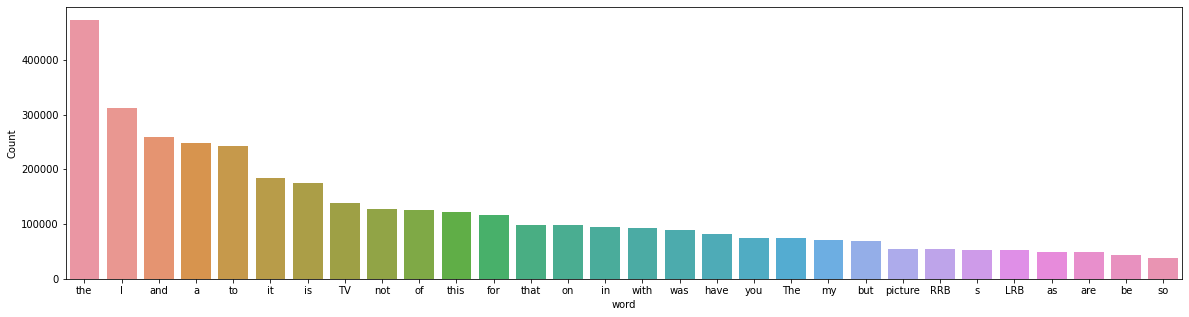

In [15]:
freq_words(tv['reviews'])

#### Checking stopwords in the reviews

In [16]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [17]:
# Checking the number of stopwords in each review
tv['stopwords'] = tv['reviews'].apply(lambda x: len([x for x in x.split() if x in stop_words]))
tv[['reviews','stopwords']].head()

,reviews,stopwords
0,Bought this TV after a great many days of pondering and reviewing various brands and styles Put my bet on Sony s name and all the good praise given to this model Exactly one year after I bought...,58
1,This TV has a very good picture for regular TV and composite inputs But I did not buy it to watch regular cable TV or to watch old VHS tapes I bought this TV because I wanted a pretty high...,70
2,I got one of these Wegas as soon as I selected channel to watch CNN I noticed a mild stretching and shrinking of the news tickers on the bottom left corner of the screen There was also...,369
3,I ll not repeat all the comments of previous review except to say the glowing praise of clarity and detail as well as the feature are on target The complaints about the weight and dee...,99
4,I ve had this television for probably about a year It is a fantastic set I am no videophile but I can tell you that it has the best picture of any set that I have owned I m pretty sure that i...,242


In [18]:
# function to remove stopwords
def remove_stopwords(rev):
  rev_new = " ".join([i for i in rev if i not in stop_words])
  return rev_new

In [19]:
tv['reviews']

0        Bought this TV after a great many days of pondering and reviewing various brands and styles  Put my bet on Sony  s name and all the good praise given to this model  Exactly one year after I bought...
1        This TV has a very good picture for regular TV   and composite inputs  But   I did not buy it to watch regular cable TV   or to watch old VHS tapes  I bought this TV because I wanted a pretty high...
2        I got one of these       Wegas   as soon as I selected channel    to watch CNN I noticed a mild stretching and shrinking of the news tickers on the bottom left corner of the screen  There was also...
3        I  ll not repeat all the comments of previous review   except to say the glowing praise of clarity and detail   as well as the        feature are on target  The complaints about the weight and dee...
4        I  ve had this television for probably about a year  It is a fantastic set  I am no videophile but I can tell you that it has the best picture of any set t

#### Checking punctuation present in the reviews

In [20]:
import string
nltk.download('punkt')
def count_punctuation(text):
    count = sum([1 for char in text if char in string.punctuation])
    return count

tv['punctuation'] = tv['reviews'].apply(lambda x: count_punctuation(x))


[nltk_data] Downloading package punkt to /Users/samridhi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
tv[['reviews','punctuation']]

,reviews,punctuation
0,Bought this TV after a great many days of pondering and reviewing various brands and styles Put my bet on Sony s name and all the good praise given to this model Exactly one year after I bought...,0
1,This TV has a very good picture for regular TV and composite inputs But I did not buy it to watch regular cable TV or to watch old VHS tapes I bought this TV because I wanted a pretty high...,0
2,I got one of these Wegas as soon as I selected channel to watch CNN I noticed a mild stretching and shrinking of the news tickers on the bottom left corner of the screen There was also...,0
3,I ll not repeat all the comments of previous review except to say the glowing praise of clarity and detail as well as the feature are on target The complaints about the weight and dee...,0
4,I ve had this television for probably about a year It is a fantastic set I am no videophile but I can tell you that it has the best picture of any set that I have owned I m pretty sure that i...,0
...,...,...
56405,Do not care to pay for a smart TV This is a great alternative I did not want a smart TV because we already use our playstation and apple tv for our app needs Why pay an extra ...,0
56406,Have always been a Samsung customer in flat screen TV until this one I knew that Sharp had been around at least all of my life and I saw the pricing on Amazon for this in TV and saved me ...,0
56407,First of all one caveat I work with HD signal distribution and switching so I should and do now how to set up a television Let s start with the TV itself First of all I had them price match F...,16
56408,After purchasing I was able to price match with the # in cart # price Fry s has for this item of On top of that I get back in Amazon points and another back LRB d...,2


#### Checking hastags present in the review text

In [22]:
tv['hastags'] = tv['reviews'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
tv['hastags'].sum()

9980

In [23]:
tv.hastags.loc[tv.hastags != 0].count()

3822

#### Checking numerics from the reviews

In [24]:
tv['numerics'] = tv['reviews'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
tv['numerics'].sum()

0

#### Checking the words which are in uppercase, which may be significant

In [25]:
tv['upper'] = tv['reviews'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
tv['reviews'][tv['upper'] > 1].count()

51569

In [26]:
tv['reviews']

0        Bought this TV after a great many days of pondering and reviewing various brands and styles  Put my bet on Sony  s name and all the good praise given to this model  Exactly one year after I bought...
1        This TV has a very good picture for regular TV   and composite inputs  But   I did not buy it to watch regular cable TV   or to watch old VHS tapes  I bought this TV because I wanted a pretty high...
2        I got one of these       Wegas   as soon as I selected channel    to watch CNN I noticed a mild stretching and shrinking of the news tickers on the bottom left corner of the screen  There was also...
3        I  ll not repeat all the comments of previous review   except to say the glowing praise of clarity and detail   as well as the        feature are on target  The complaints about the weight and dee...
4        I  ve had this television for probably about a year  It is a fantastic set  I am no videophile but I can tell you that it has the best picture of any set t

#### Cleaning steps

In [27]:


# remove short words whose (length < 3)
tv['reviews'] = tv['reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# removing puctuations
tv['reviews'] = tv['reviews'].str.replace('[^\w\s]','')
tv['reviews'].head()

# make entire review text lowercase
reviews = [r.lower() for r in tv['reviews']]

# remove stopwords from the reviews
reviews = [remove_stopwords(r.split()) for r in reviews]




<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/1643325890.py:5: DeprecationWarning: invalid escape sequence \w
  tv['reviews'] = tv['reviews'].str.replace('[^\w\s]','')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/1643325890.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tv['reviews'] = tv['reviews'].str.replace('[^\w\s]','')


In [28]:
tv['reviews']

0        Bought this after great many days pondering and reviewing various brands and styles Put bet Sony name and all the good praise given this model Exactly one year after bought the problems started ou...
1        This has very good picture for regular and composite inputs But did not buy watch regular cable watch old VHS tapes bought this because wanted pretty high end normal with component inputs play Xbo...
2        got one these Wegas soon selected channel watch CNN noticed mild stretching and shrinking the news tickers the bottom left corner the screen There was also mild vertical distortion LRB concavity R...
3        not repeat all the comments previous review except say the glowing praise clarity and detail well the feature are target The complaints about the weight and deep menus are similarly target The onl...
4        had this television for probably about year fantastic set videophile but can tell you that has the best picture any set that have owned pretty sure that al

         word  count
60    picture  60144
99        rrb  54885
96        lrb  51694
1       great  39739
412       set  33965
18        one  33235
110     sound  32724
57      would  32465
13       good  32066
104   quality  30198
1300  samsung  27720
82       like  25666
484       get  25433
29     screen  24606
220     price  22713
799    amazon  22472
631       use  19608
129      also  18272
371      time  17584
210    remote  17525
98       even  17373
195    really  17338
211    better  16549
55        buy  16328
757     could  16143
0      bought  15941
44    problem  15110
153      well  15080
49       back  14871
65      cable  14756
185      much  14634
11       sony  14318
1277      lcd  14260
1454     hdmi  13773
620     first  13757


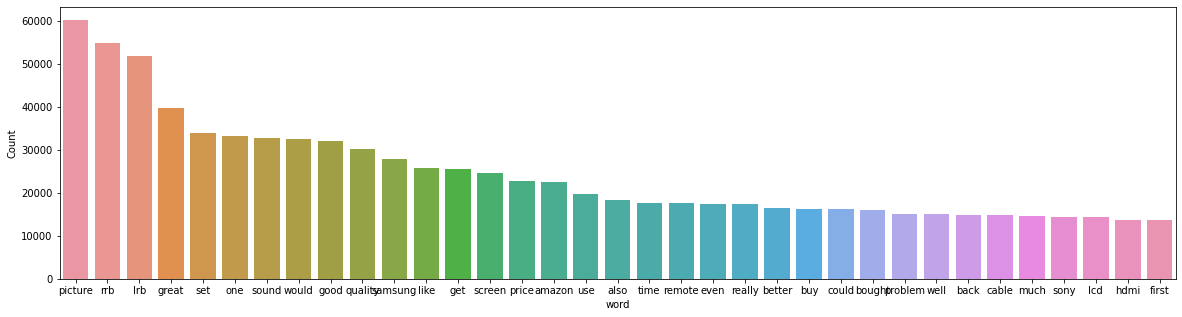

In [29]:
freq_words(reviews, 35)

In [30]:
# !pip3 install -U spacy
# !python3 -m spacy download en 
import spacy
# en_core_web_sm

In [31]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


In [32]:
import pandas as pd
stemmer = SnowballStemmer("english")
# reviews_3 = [stemmer.stem(plural) for plural in original_words]

def stemming_and_lemmatization(texts, tags=['NOUN', 'ADJ']):
    output = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        output.append([token.lemma_ for token in doc if token.pos_ in tags])
    return output

In [33]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['good', 'picture', 'regular', 'composite', 'inputs', 'buy', 'watch', 'regular', 'cable', 'watch', 'old', 'vhs', 'tapes', 'bought', 'wanted', 'pretty', 'high', 'end', 'normal', 'component', 'inputs', 'play', 'xbox', 'displeased', 'find', 'using', 'component', 'inputs', 'playing', 'xbox', 'numerous', 'wave', 'like', 'distortion', 'lines', 'appeared', 'picture', 'removed', 'component', 'cables', 'dissapeared', 'browsed', 'online', 'forums', 'found', 'many', 'people', 'compatability', 'issues', 'sony', 'xbox', 'plan', 'using', 'xbox', 'component', 'inputs', 'lrb', 'maybe', 'even', 'composite', 'rrb', 'stay', 'away', 'end', 'dissapointing', 'far', 'picture', 'quality', 'concerned', 'audio', 'trivial', 'usually', 'mute', 'sound', 'using', 'surround', 'system', 'lrb', 'often', 'rrb']


In [34]:
print(tokenized_reviews[1])
len(tokenized_reviews[1])

['good', 'picture', 'regular', 'composite', 'inputs', 'buy', 'watch', 'regular', 'cable', 'watch', 'old', 'vhs', 'tapes', 'bought', 'wanted', 'pretty', 'high', 'end', 'normal', 'component', 'inputs', 'play', 'xbox', 'displeased', 'find', 'using', 'component', 'inputs', 'playing', 'xbox', 'numerous', 'wave', 'like', 'distortion', 'lines', 'appeared', 'picture', 'removed', 'component', 'cables', 'dissapeared', 'browsed', 'online', 'forums', 'found', 'many', 'people', 'compatability', 'issues', 'sony', 'xbox', 'plan', 'using', 'xbox', 'component', 'inputs', 'lrb', 'maybe', 'even', 'composite', 'rrb', 'stay', 'away', 'end', 'dissapointing', 'far', 'picture', 'quality', 'concerned', 'audio', 'trivial', 'usually', 'mute', 'sound', 'using', 'surround', 'system', 'lrb', 'often', 'rrb']


80

In [35]:
reviews_2 = stemming_and_lemmatization(tokenized_reviews)
print(reviews_2[1])

['good', 'picture', 'regular', 'composite', 'input', 'regular', 'cable', 'old', 'vhs', 'tape', 'high', 'end', 'normal', 'component', 'displeased', 'find', 'component', 'xbox', 'numerous', 'wave', 'distortion', 'line', 'picture', 'removed', 'component', 'cable', 'online', 'forum', 'many', 'people', 'compatability', 'issue', 'plan', 'component', 'input', 'composite', 'rrb', 'end', 'far', 'picture', 'quality', 'audio', 'trivial', 'mute', 'sound', 'surround', 'system', 'rrb']


In [36]:
set(tokenized_reviews[1]) - set(reviews_2[1])

{'appeared',
 'away',
 'bought',
 'browsed',
 'buy',
 'cables',
 'concerned',
 'dissapeared',
 'dissapointing',
 'even',
 'forums',
 'found',
 'inputs',
 'issues',
 'like',
 'lines',
 'lrb',
 'maybe',
 'often',
 'play',
 'playing',
 'pretty',
 'sony',
 'stay',
 'tapes',
 'using',
 'usually',
 'wanted',
 'watch'}

In [37]:
reviews_3 = []
for i in range(len(reviews_2)):
    reviews_3.append(' '.join(reviews_2[i]))
    
tv['reviews'] = reviews_3

        word  count
31   picture  58786
7       good  41979
245    great  38150
58   quality  30163
62     sound  28356
16    screen  25266
56       rrb  24431
126    price  23156
217     time  21024
11   problem  20983
470   amazon  20095
35     cable  16960
121   remote  16677
10      year  15943
1        day  14437
54     issue  14232
308    color  13973
79    review  13432
409      new  13168
741      lcd  12767
159     well  12508
29     month  12409
345    movie  12387
27     black  12375
414     room  12200
132      box  12035
213    thing  11946
335  speaker  11280
9      model  11158
170  service  10992
223    video  10973
522  setting  10943
833     hdmi  10902
66   channel  10782
131  feature  10702


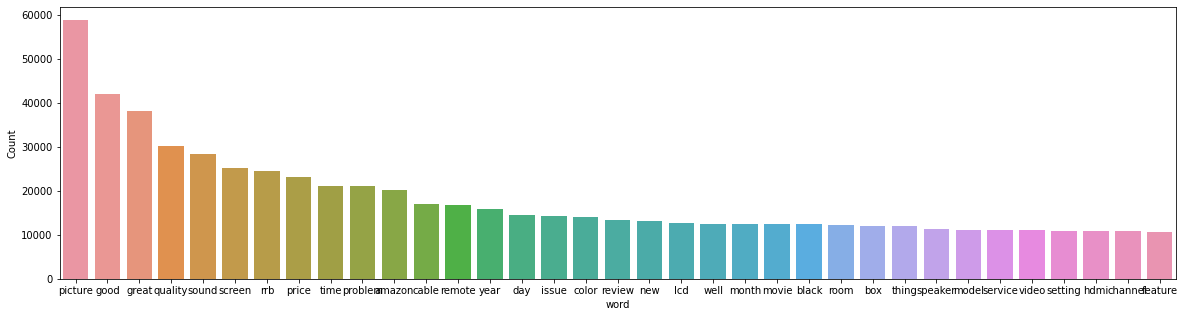

In [38]:
freq_words(tv['reviews'], 35)

#### Removing any URLs in the reviews

In [39]:
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)



# remove all urls from df
import re
import string

tv['reviews'] = tv['reviews'].apply(lambda x: remove_url(x))

#### Removing html tags from the text

In [40]:
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)



# remove all html tags from df
tv['reviews'] = tv['reviews'].apply(lambda x: remove_html(x))

#### Removing emojis and emoticons

In [41]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



# remove all emojis from df
tv['reviews'] = tv['reviews'].apply(lambda x: remove_emoji(x))

In [42]:
!pip3 install emot
import emot
from emot.emo_unicode import UNICODE_EMOJI, EMOTICONS_EMO

# Function for removing emoticons
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
    return emoticon_pattern.sub(r'', text)



# tv['reviews'] = tv['reviews'].apply(lambda x: remove_emoticons(x))

<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
<>:7: DeprecationWarning: invalid escape sequence \(
<>:7: DeprecationWarning: invalid escape sequence \|
<>:7: DeprecationWarning: invalid escape sequence \)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/2788696561.py:7: DeprecationWarning: invalid escape sequence \(
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/2788696561.py:7: DeprecationWarning: invalid escape sequence \|
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/2788696561.py:7: DeprecationWarning: invalid escape sequence \)
  emoticon_pattern = re.compile(u'\(' + u'\|'.join(k for k in EMOTICONS_EMO) + u'\)')


DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [43]:
# correction of the words spelling - not done at it is taking  lot of time to run
# from textblob import TextBlob
# tv['reviews'].apply(lambda x: str(TextBlob(x).correct()))

        word  count
31   picture  58786
7       good  41979
245    great  38150
58   quality  30163
62     sound  28356
16    screen  25266
56       rrb  24431
126    price  23156
217     time  21024
11   problem  20983
470   amazon  20095
35     cable  16960
121   remote  16677
10      year  15943
1        day  14437
54     issue  14232
308    color  13973
79    review  13432
409      new  13168
741      lcd  12767
159     well  12508
29     month  12409
345    movie  12387
27     black  12375
414     room  12200
132      box  12035
213    thing  11946
335  speaker  11280
9      model  11158
170  service  10992


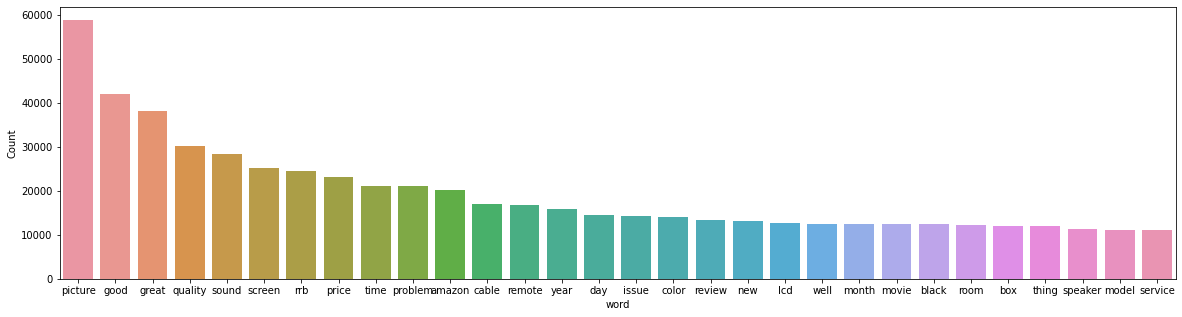

In [44]:
freq_words(tv['reviews'])

In [45]:
def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
<>:4: DeprecationWarning: invalid escape sequence \[
<>:6: DeprecationWarning: invalid escape sequence \w
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/2170350517.py:4: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
/var/folders/gk/w9x3t41958b3mryczvgyr0fr0000gn/T/ipykernel_1925/2170350517.py:6: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


In [46]:


tv['reviews'] = tv['reviews'].apply(round1)
tv['reviews']



0        many day various brand style bet name good praise model year problem outta fine morning entire screen purple haze pink diagonal line repair think sharpness clarity next problem black minute repair...
1        good picture regular composite input regular cable old vhs tape high end normal component displeased find component xbox numerous wave distortion line picture removed component cable online forum ...
2        wegas channel watch mild stretching news ticker bottom corner screen mild vertical distortion concavity rrb right border reading review com ubiquitousness distortion issue wegas store detail unit ...
3        repeat comment previous review praise clarity detail target complaint weight deep menu thing geometry straight line second time model circuit city darn thing weigh feature wonderful home video asp...
4        television fantastic good picture set good picture television front store pro great picture crisp clear television local cable company provider cable box h

        word  count
31   picture  58786
7       good  41979
245    great  38150
58   quality  30163
62     sound  28356
16    screen  25266
56       rrb  24431
126    price  23156
217     time  21024
11   problem  20983
470   amazon  20095
35     cable  16960
121   remote  16677
10      year  15943
1        day  14437
54     issue  14232
308    color  13973
79    review  13432
409      new  13168
741      lcd  12767
159     well  12508
29     month  12409
345    movie  12387
27     black  12375
414     room  12200
132      box  12035
213    thing  11946
335  speaker  11280
9      model  11158
170  service  10992


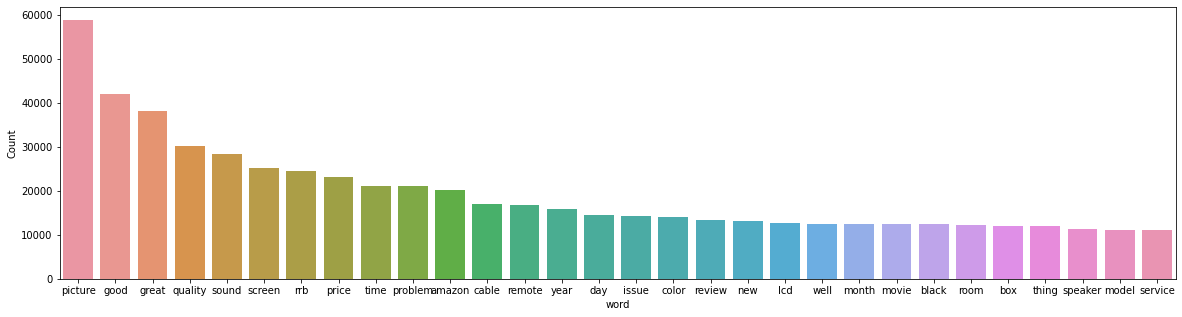

In [47]:
freq_words(tv['reviews'])

In [48]:


# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)



In [49]:


tv['reviews'] = tv['reviews'].apply(round2)
tv['reviews']



0        many day various brand style bet name good praise model year problem outta fine morning entire screen purple haze pink diagonal line repair think sharpness clarity next problem black minute repair...
1        good picture regular composite input regular cable old vhs tape high end normal component displeased find component xbox numerous wave distortion line picture removed component cable online forum ...
2        wegas channel watch mild stretching news ticker bottom corner screen mild vertical distortion concavity rrb right border reading review com ubiquitousness distortion issue wegas store detail unit ...
3        repeat comment previous review praise clarity detail target complaint weight deep menu thing geometry straight line second time model circuit city darn thing weigh feature wonderful home video asp...
4        television fantastic good picture set good picture television front store pro great picture crisp clear television local cable company provider cable box h

In [50]:
tv['word_count'] = tv['reviews'].apply(lambda x: len(str(x).split(" ")))
tv[['reviews','word_count']].head()

,reviews,word_count
0,many day various brand style bet name good praise model year problem outta fine morning entire screen purple haze pink diagonal line repair think sharpness clarity next problem black minute repair...,35
1,good picture regular composite input regular cable old vhs tape high end normal component displeased find component xbox numerous wave distortion line picture removed component cable online forum ...,48
2,wegas channel watch mild stretching news ticker bottom corner screen mild vertical distortion concavity rrb right border reading review com ubiquitousness distortion issue wegas store detail unit ...,272
3,repeat comment previous review praise clarity detail target complaint weight deep menu thing geometry straight line second time model circuit city darn thing weigh feature wonderful home video asp...,58
4,television fantastic good picture set good picture television front store pro great picture crisp clear television local cable company provider cable box hooked video input great dvd player hooked...,136


        word  count
31   picture  58786
7       good  41979
245    great  38150
58   quality  30163
62     sound  28356
16    screen  25266
56       rrb  24431
126    price  23156
217     time  21024
11   problem  20983
470   amazon  20095
35     cable  16960
121   remote  16677
10      year  15943
1        day  14437
54     issue  14232
308    color  13973
79    review  13432
409      new  13168
741      lcd  12767
159     well  12508
29     month  12409
345    movie  12387
27     black  12375
414     room  12200
132      box  12035
213    thing  11946
335  speaker  11280
9      model  11158
170  service  10992


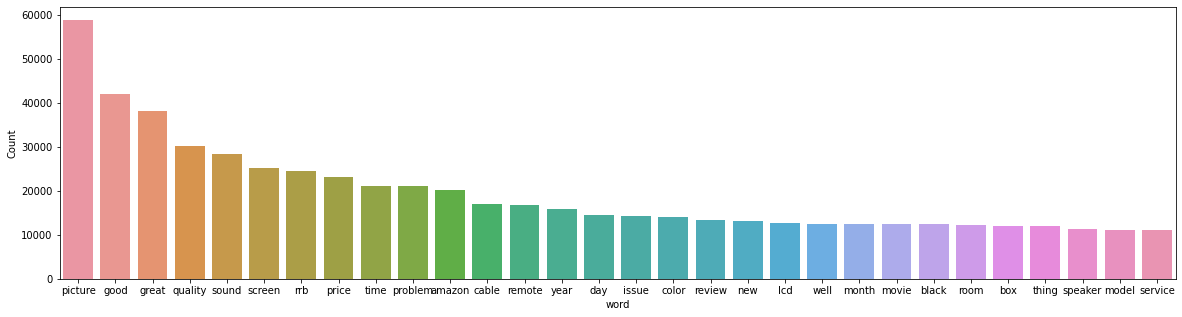

In [51]:
freq_words(tv['reviews'])

In [52]:
tv.to_csv('tv_processed.csv')

In [53]:
tv

,Unnamed: 0,product_Id,rating,reviews,stopwords,punctuation,hastags,numerics,upper,word_count
0,0,B00005T3DP-0000,0,many day various brand style bet name good praise model year problem outta fine morning entire screen purple haze pink diagonal line repair think sharpness clarity next problem black minute repair...,58,0,0,0,7,35
1,1,B00005T3DP-0001,0,good picture regular composite input regular cable old vhs tape high end normal component displeased find component xbox numerous wave distortion line picture removed component cable online forum ...,70,0,0,0,23,48
2,2,B00005T3DP-0002,2,wegas channel watch mild stretching news ticker bottom corner screen mild vertical distortion concavity rrb right border reading review com ubiquitousness distortion issue wegas store detail unit ...,369,0,0,0,71,272
3,3,B00005T3DP-0003,3,repeat comment previous review praise clarity detail target complaint weight deep menu thing geometry straight line second time model circuit city darn thing weigh feature wonderful home video asp...,99,0,0,0,15,58
4,4,B00005T3DP-0004,4,television fantastic good picture set good picture television front store pro great picture crisp clear television local cable company provider cable box hooked video input great dvd player hooked...,242,0,0,0,38,136
...,...,...,...,...,...,...,...,...,...,...
56405,56405,B00JEVHX9C-0008,4,care smart great alternative smart playstation apple app need extra app big screen great watch internet ipad extra bell whistle satisfied indifferent roku streaming normal hdmi plug port power rok...,82,0,0,0,23,54
56406,56406,B00JEVHX9C-0009,4,customer flat screen least life pricing amazon purchase thought chance amazon perfect condition loaded control setting right key great picture day sound bar nice home theater bargain standard,73,0,0,0,12,28
56407,56407,B00JEVHX9C-0010,4,caveat work signal distribution set television first price match fry absolute bargain sharp consider component big factor reliability long haul box opinion small amount time adjustment well proble...,299,16,16,0,40,145
56408,56408,B00JEVHX9C-0011,4,able price match cart price fry item top amazon handle purchase card big hard maneuver helper mine cheeta mount aptmm flush tilt happy gorgeous picture setting content good speaker lot plan audio ...,62,2,2,0,11,39


In [54]:
!pip3 install -q wordcloud
import wordcloud

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [55]:
text_for_cloud = " ".join(word for word in tv.reviews)
print ("There are {} words in the combination of all reviews.".format(len(text_for_cloud)))

There are 17572047 words in the combination of all reviews.


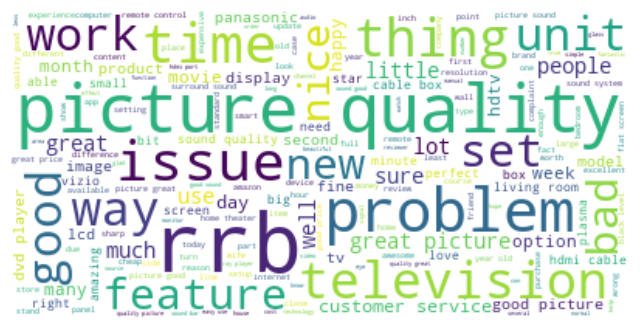

In [56]:
from matplotlib.pyplot import figure

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_for_cloud)

# Display the generated image:
# the matplotlib way:
figure(figsize= (8,8), dpi= 100)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
freq_of_words = pd.Series(' '.join(tv['reviews']).split()).value_counts()[:40]
freq_of_words

picture       58786
good          41979
great         38150
quality       30163
sound         28356
screen        25266
rrb           24431
price         23156
time          21024
problem       20983
amazon        20095
cable         16960
remote        16677
year          15943
day           14437
issue         14232
color         13973
review        13432
new           13168
lcd           12767
well          12508
month         12409
movie         12387
black         12375
room          12200
box           12035
thing         11946
speaker       11280
model         11158
service       10992
video         10973
setting       10943
hdmi          10902
channel       10782
feature       10702
old           10464
product       10460
use           10219
television    10010
set            9965
dtype: int64